In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [99]:
df = pd.read_csv('AdultIncome.csv')
df.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19787 entries, 0 to 19786
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             19787 non-null  int64 
 1   wc              19787 non-null  object
 2   education       19787 non-null  object
 3   marital status  19787 non-null  object
 4   race            19787 non-null  object
 5   gender          19787 non-null  object
 6   hours per week  19787 non-null  int64 
 7   IncomeClass     19787 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.2+ MB


In [101]:
df.describe()

,age,hours per week
count,19787.000000,19787.000000
mean,37.467378,40.938596
std,12.543376,10.991015
min,17.000000,1.000000
25%,27.000000,40.000000
50%,36.000000,40.000000
75%,46.000000,45.000000
max,90.000000,99.000000


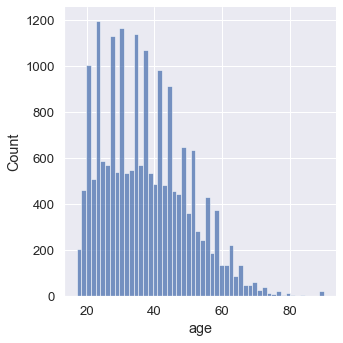

In [102]:
sns.displot(df['age'])

<AxesSubplot:xlabel='age'>

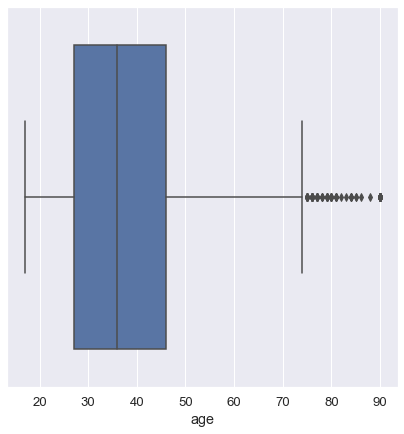

In [103]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='hours per week', ylabel='Density'>

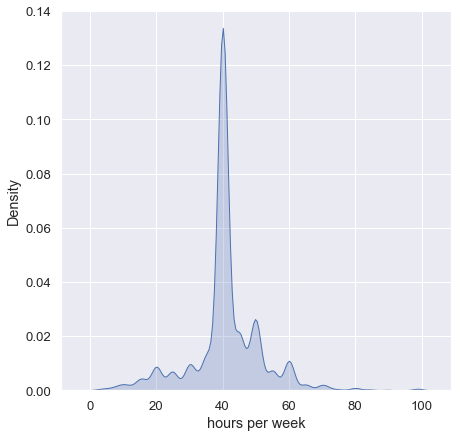

In [104]:
sns.kdeplot(df['hours per week'], shade=True)

<AxesSubplot:xlabel='hours per week'>

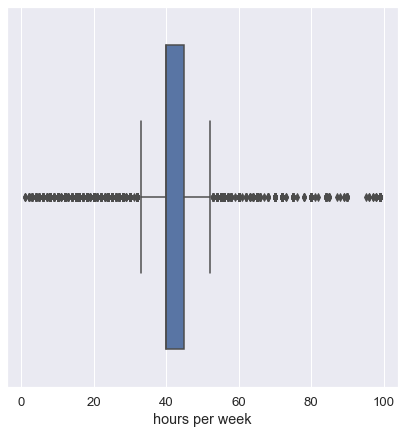

In [105]:
sns.boxplot(df['hours per week'])

wc 

 Private         17248
 Local-gov        1717
 Federal-gov       819
 Never-worked        3
Name: wc, dtype: int64 



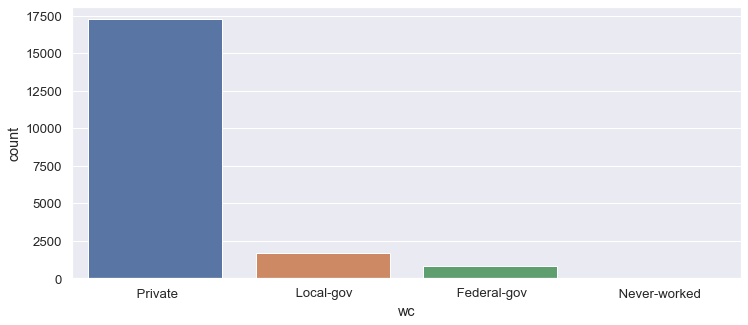

--------------------------------------------------
education 

 HS-grad         8207
 Some-college    5559
 Bachelors       4162
 Masters         1285
 Prof-school      309
 Doctorate        221
 Preschool         44
Name: education, dtype: int64 



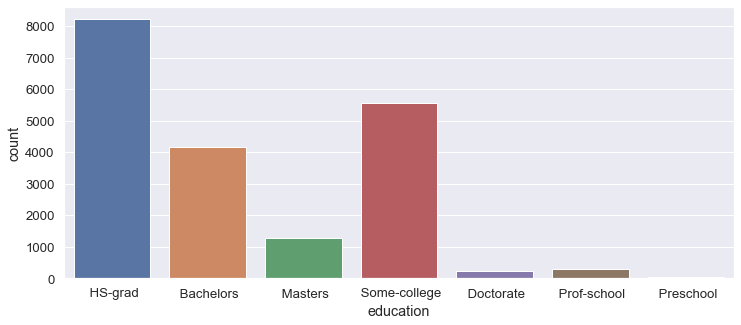

--------------------------------------------------
marital status 

Married           9285
 Never-married    7056
 Divorced         2917
 Widowed           529
Name: marital status, dtype: int64 



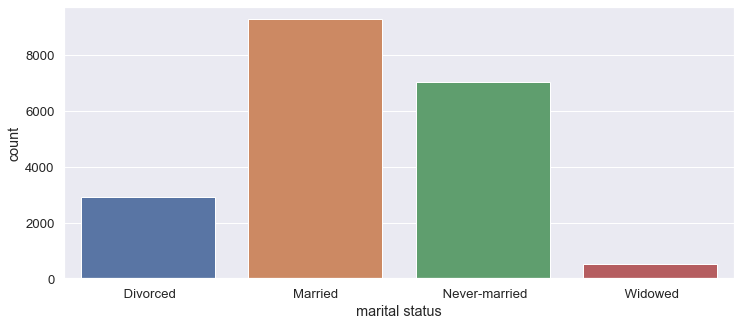

--------------------------------------------------
race 

 White                 16995
 Black                  1828
 Asian-Pac-Islander      650
 Amer-Indian-Eskimo      173
 Other                   141
Name: race, dtype: int64 



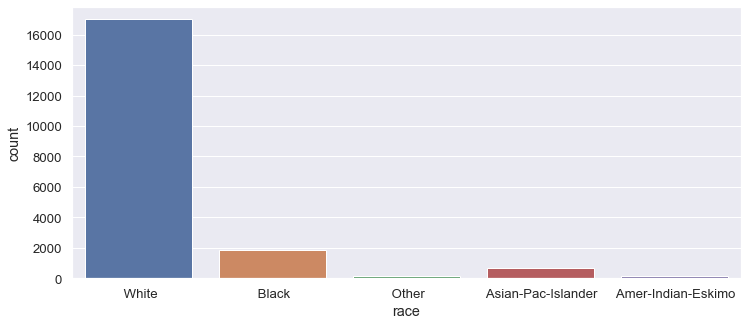

--------------------------------------------------
gender 

 Male      13100
 Female     6687
Name: gender, dtype: int64 



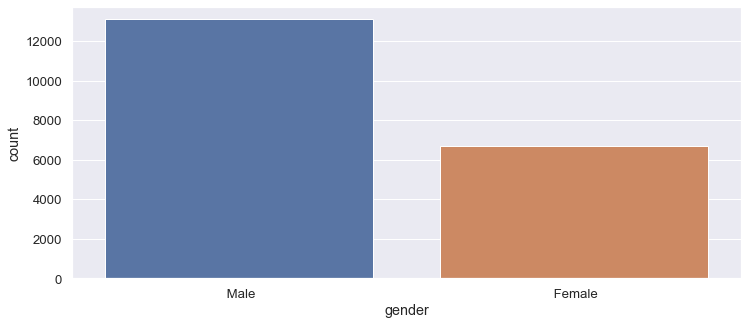

--------------------------------------------------
IncomeClass 

 <=50K    14575
 >50K      5212
Name: IncomeClass, dtype: int64 



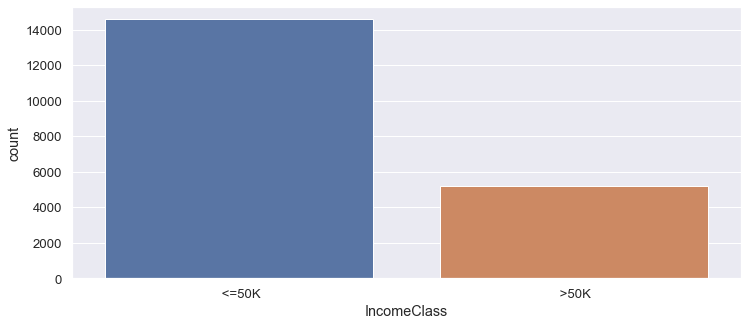

--------------------------------------------------


In [106]:
for col in df[['wc', 'education', 'marital status', 'race', 'gender', 'IncomeClass']]:
    print(col, '\n')
    print(df[col].value_counts(),'\n')
    plt.figure(figsize=(12,5))
    sns.countplot(df[col])
    plt.show()
    print(50*('-'))

In [107]:
cat_cols = df[['wc', 'education', 'marital status', 'race', 'gender']]

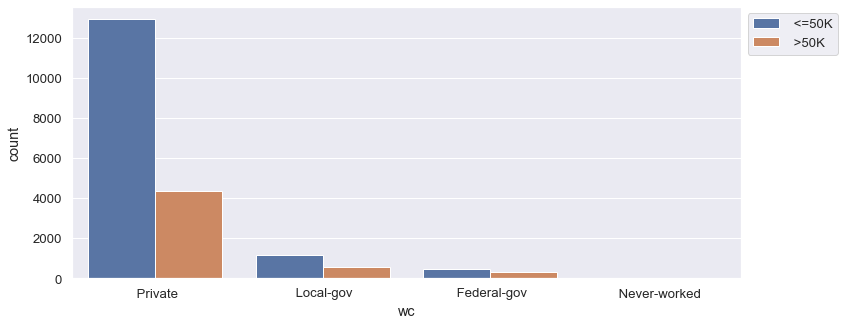

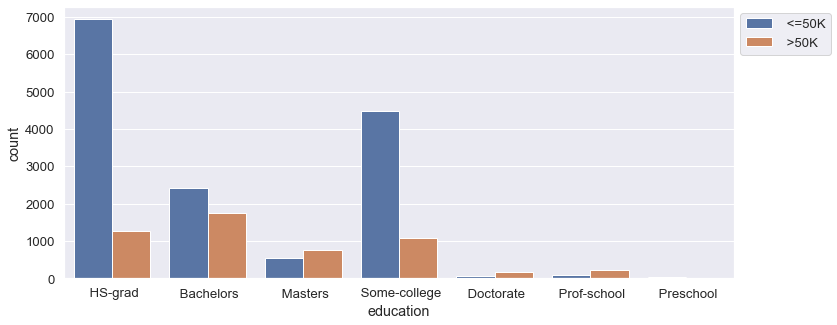

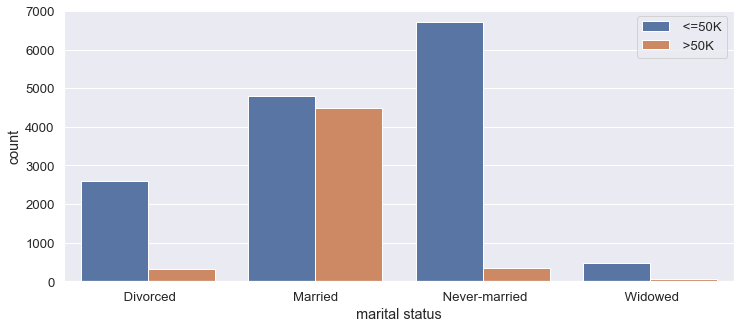

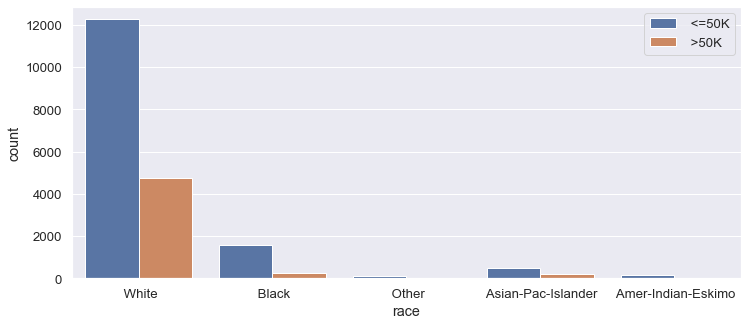

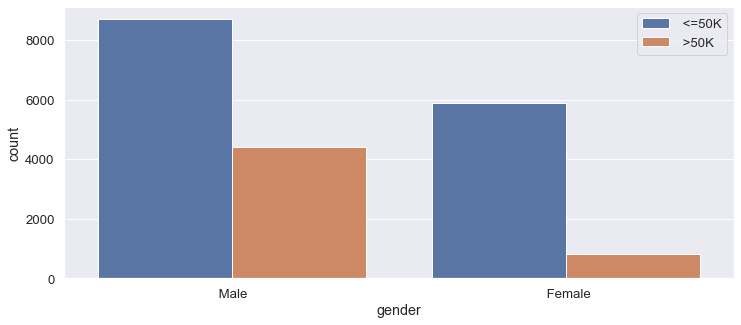

In [108]:
for col in cat_cols:
    if col !='IncomeClass':
        plt.figure(figsize=(12,5))
        sns.countplot(df[col], hue=df['IncomeClass'])
        plt.legend(bbox_to_anchor=(1,1))
        plt.show()
            

<AxesSubplot:xlabel='age', ylabel='hours per week'>

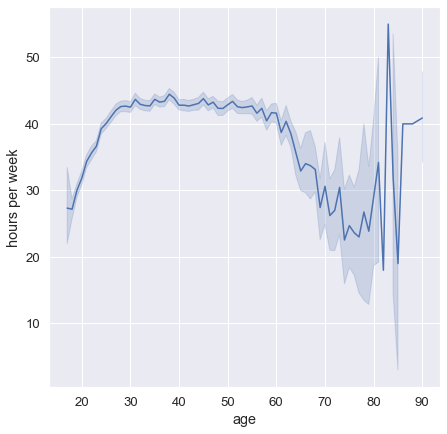

In [109]:
sns.lineplot(data=df, x='age', y='hours per week')

In [110]:
df.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K
1,28,Private,Bachelors,Married,Black,Female,40,<=50K
2,37,Private,Masters,Married,White,Female,40,<=50K
3,31,Private,Masters,Never-married,White,Female,50,>50K
4,42,Private,Bachelors,Married,White,Male,40,>50K


In [111]:
df_copy = df.copy()

In [112]:
le = LabelEncoder()
for col in df_copy:
    df_copy[col] = le.fit_transform(df_copy[col])

In [113]:
df_copy.head()

,age,wc,education,marital status,race,gender,hours per week,IncomeClass
0,21,3,2,0,4,1,39,0
1,11,3,0,3,2,0,39,0
2,20,3,3,3,4,0,39,0
3,14,3,3,1,4,0,49,1
4,25,3,0,3,4,1,39,1


<AxesSubplot:>

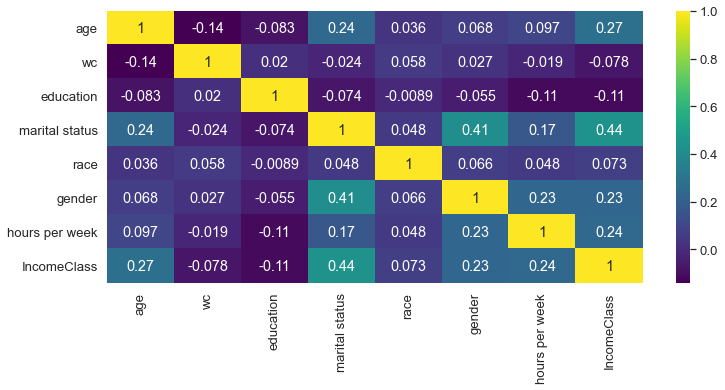

In [114]:
plt.figure(figsize=(12,5))
sns.heatmap(df_copy.corr(), annot=True, cmap='viridis')

In [115]:
df_copy = df_copy[['age', 'hours per week']]
df_copy.head()

,age,hours per week
0,21,39
1,11,39
2,20,39
3,14,49
4,25,39


In [116]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_copy)

### Elbow Method

In [117]:
scores = []
for k in range(1,11):
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    scores.append(model.inertia_)
scores

[39574.00000000002,
 25570.23760981289,
 17895.55420767747,
 12916.754597982206,
 10388.892639008922,
 8373.066060308654,
 7240.150749804751,
 6368.620128403526,
 5608.6148631402475,
 5095.63286470295]

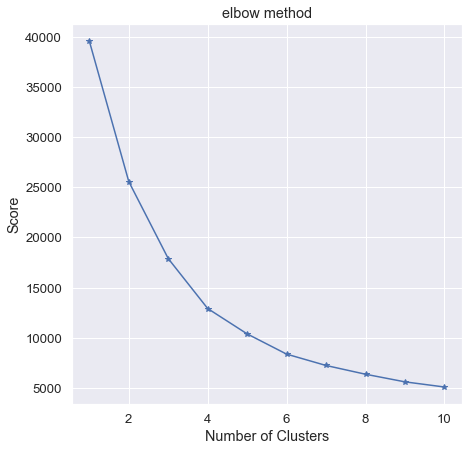

In [118]:
plt.plot(range(1,11), scores, '-*')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('elbow method')
plt.show()

### KMeans

In [119]:
model = KMeans(n_clusters=4)
model.fit(scaled_data)
cluster = model.predict(scaled_data)
cluster

array([1, 1, 1, ..., 1, 3, 2])

In [120]:
centroid = model.cluster_centers_
centroid

array([[ 0.13358622,  1.56389995],
       [-0.61529317,  0.00356754],
       [-0.94034607, -1.80364062],
       [ 1.12419214, -0.15393715]])

In [121]:
df_copy['cluster'] = cluster

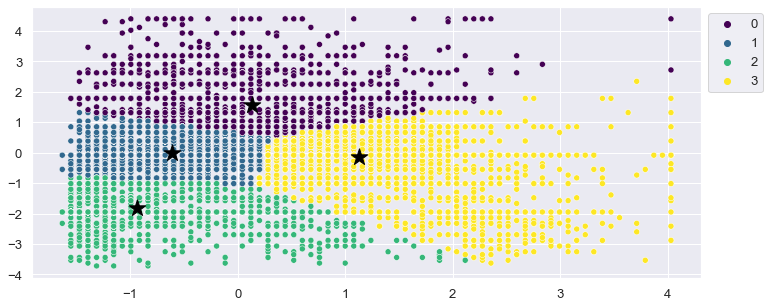

In [122]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')
plt.scatter(centroid[:, 0], centroid[:, 1],s=300, marker='*', c='black')
plt.legend(bbox_to_anchor=(1,1), loc=(2))

In [123]:
df_copy

,age,hours per week,cluster
0,21,39,1
1,11,39,1
2,20,39,1
3,14,49,1
4,25,39,3
...,...,...,...
19782,36,39,3
19783,5,39,1
19784,23,39,1
19785,41,39,3


In [124]:
df['cluster'] = cluster

In [125]:
df[df['cluster']==0]

,age,wc,education,marital status,race,gender,hours per week,IncomeClass,cluster
5,37,Private,Some-college,Married,Black,Male,80,>50K,0
8,40,Private,Doctorate,Married,White,Male,60,>50K,0
12,39,Private,HS-grad,Divorced,White,Male,80,<=50K,0
27,47,Private,Prof-school,Married,White,Female,60,>50K,0
28,50,Federal-gov,Bachelors,Divorced,White,Male,55,>50K,0
...,...,...,...,...,...,...,...,...,...
19758,35,Local-gov,Bachelors,Married,White,Male,50,<=50K,0
19768,27,Private,HS-grad,Never-married,White,Female,64,<=50K,0
19770,30,Private,HS-grad,Divorced,White,Male,55,<=50K,0
19773,34,Private,Doctorate,Married,White,Male,60,>50K,0


In [126]:
df[df['cluster']==1]

,age,wc,education,marital status,race,gender,hours per week,IncomeClass,cluster
0,38,Private,HS-grad,Divorced,White,Male,40,<=50K,1
1,28,Private,Bachelors,Married,Black,Female,40,<=50K,1
2,37,Private,Masters,Married,White,Female,40,<=50K,1
3,31,Private,Masters,Never-married,White,Female,50,>50K,1
7,32,Private,HS-grad,Never-married,White,Male,40,<=50K,1
...,...,...,...,...,...,...,...,...,...
19775,37,Private,Some-college,Divorced,White,Female,39,<=50K,1
19777,30,Private,HS-grad,Never-married,Black,Male,46,<=50K,1
19778,38,Private,Bachelors,Divorced,Black,Female,45,>50K,1
19783,22,Private,Some-college,Never-married,White,Male,40,<=50K,1


In [127]:
df[df['cluster']==2]

,age,wc,education,marital status,race,gender,hours per week,IncomeClass,cluster
6,23,Private,Bachelors,Never-married,White,Female,30,<=50K,2
18,19,Private,HS-grad,Married,White,Female,25,<=50K,2
26,18,Private,HS-grad,Never-married,White,Female,30,<=50K,2
39,19,Private,Some-college,Never-married,White,Male,32,<=50K,2
43,18,Private,HS-grad,Never-married,White,Male,30,<=50K,2
...,...,...,...,...,...,...,...,...,...
19755,34,Private,HS-grad,Never-married,White,Female,28,<=50K,2
19765,46,Private,Masters,Married,White,Female,22,>50K,2
19779,31,Private,Masters,Divorced,Other,Female,30,<=50K,2
19781,32,Private,Masters,Never-married,Asian-Pac-Islander,Male,11,<=50K,2


In [128]:
df[df['cluster']==3]

,age,wc,education,marital status,race,gender,hours per week,IncomeClass,cluster
4,42,Private,Bachelors,Married,White,Male,40,>50K,3
9,59,Private,HS-grad,Divorced,White,Female,40,<=50K,3
10,56,Local-gov,Bachelors,Married,White,Male,40,>50K,3
13,49,Private,HS-grad,Married,White,Male,40,<=50K,3
15,45,Private,Bachelors,Divorced,White,Male,40,<=50K,3
...,...,...,...,...,...,...,...,...,...
19767,46,Private,Some-college,Married,White,Male,48,>50K,3
19774,54,Private,Bachelors,Married,Asian-Pac-Islander,Male,50,>50K,3
19780,43,Private,HS-grad,Married,White,Male,40,<=50K,3
19782,53,Private,Masters,Married,White,Male,40,>50K,3


### Agglomerative Clustering (Hierarchical)

In [129]:
model = AgglomerativeClustering(n_clusters=4)
cluster = model.fit_predict(scaled_data)
cluster

array([0, 1, 0, ..., 0, 0, 2], dtype=int64)

<AxesSubplot:>

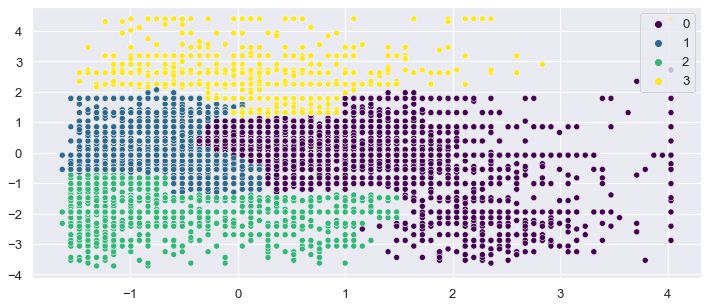

In [131]:
plt.figure(figsize=(12,5))
sns.scatterplot(scaled_data[:, 0], scaled_data[:, 1], hue=cluster, palette='viridis')